## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [2]:
# Define path
path = r'C:\Users\Lukman\Desktop\FEMINA CF\Machine Learning\Datasets'

In [3]:
# Import data
climate = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [4]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [5]:
#Read in the pleasant weather data.
df = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#dropping unrelated station data from main dataset
df_reduced=climate.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [7]:
df_reduced

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [8]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_reduced.drop(['DATE', 'MONTH'], axis=1)
y = df.drop(['DATE'], axis=1)

In [9]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


## Scaling data

In [12]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,2,2.1,0.69,1.0131,2.45,0.06,0,6.9,20.4,13.6,...,6,0.83,1.0082,1.13,0.28,0,2.1,15.6,13.7,17.6
20472,8,1.7,0.82,1.0166,0.58,0.09,0,0.0,-1.8,-3.2,...,5,0.82,1.0142,0.23,0.41,0,3.4,10.7,7.9,13.5
18269,7,1.5,0.84,1.0097,0.41,0.07,2,0.6,-1.8,-6.0,...,5,0.90,1.0186,0.43,0.03,0,3.2,1.0,-3.9,5.9
7713,2,2.1,0.74,1.0207,0.80,0.00,0,3.5,-1.4,-3.8,...,8,0.91,1.0032,0.19,1.58,0,0.0,6.8,5.5,9.6
21958,7,4.4,0.69,1.0135,0.58,1.18,0,0.5,6.1,1.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
11464,7,1.4,0.64,1.0301,2.82,0.00,0,10.1,18.3,10.6,...,4,0.89,1.0378,3.10,0.00,0,12.5,13.1,9.0,16.9
3984,3,2.1,0.80,1.0180,0.59,0.00,0,3.6,3.7,-0.5,...,6,0.90,1.0014,0.43,0.03,0,3.2,10.9,9.3,12.5
4752,8,2.1,0.94,1.0180,0.18,0.00,0,0.0,-3.9,-7.4,...,8,0.96,1.0336,0.13,0.00,0,0.0,10.5,9.7,11.4
11092,7,2.1,0.83,1.0190,1.97,0.50,0,5.5,15.7,11.2,...,7,0.89,1.0032,1.87,0.77,0,3.4,12.6,9.5,15.8
21377,2,1.3,0.61,1.0174,1.34,0.00,0,13.5,18.8,9.9,...,5,0.82,1.0142,2.64,0.41,0,3.4,10.7,7.9,13.5


In [13]:

#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


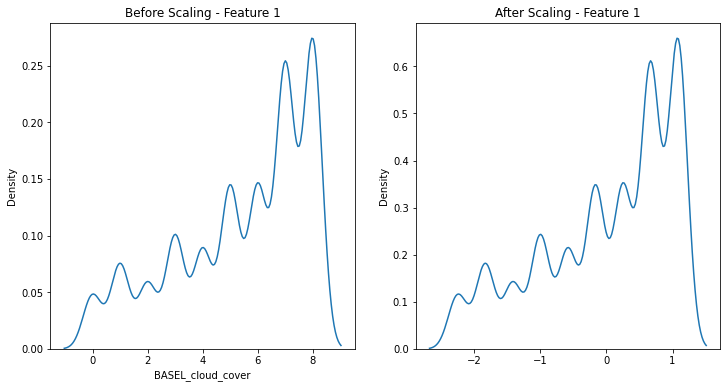

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Plot KDE for a specific feature before scaling
ax1.set_title('Before Scaling - Feature 1')
sns.kdeplot(X_train.iloc[:, 0], ax=ax1)  

# Plot KDE for the same feature after scaling
ax2.set_title('After Scaling - Feature 1')
sns.kdeplot(X_train_sc[:, 0], ax=ax2)  # Scaled feature (NumPy array)

plt.show()

In [15]:
#Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

## Create the ANN

In [16]:
#hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
#and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [17]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.46380432256565185
0.4696758452422447


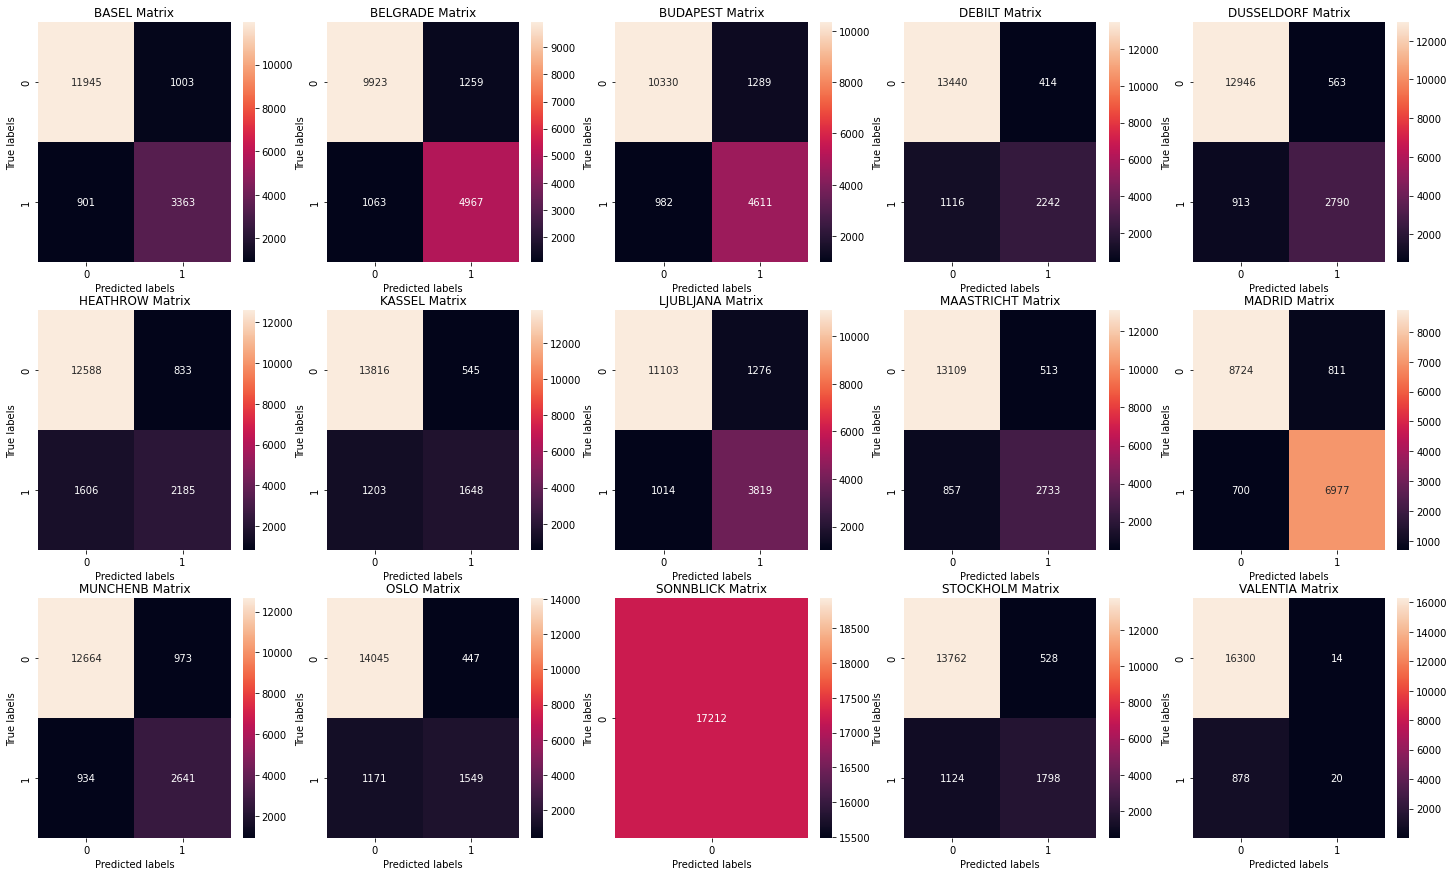

In [18]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

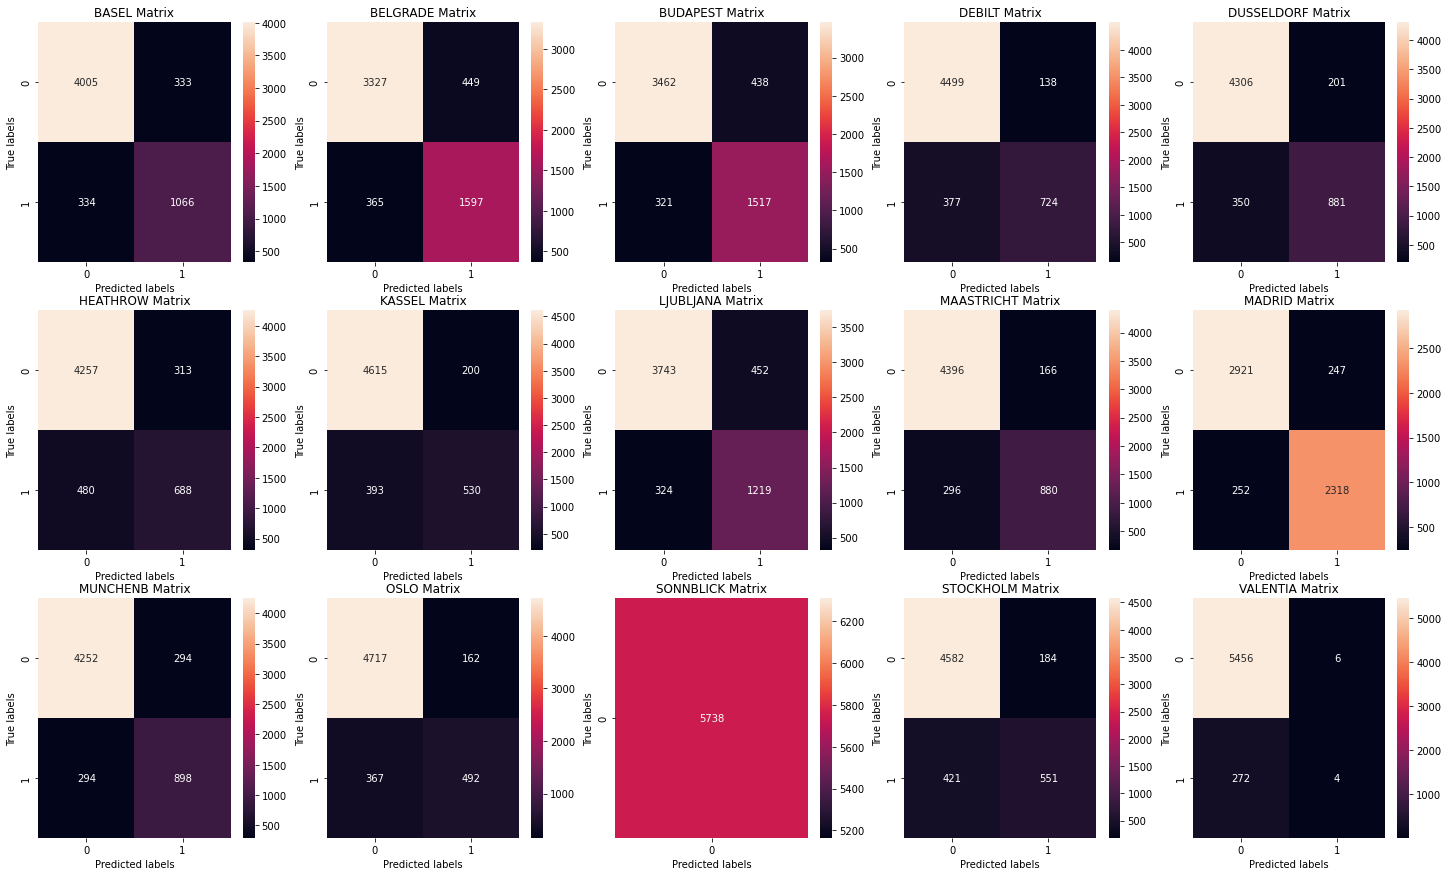

In [19]:
# Confusion matrix based on the last "k" in the sequence (Test data)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [20]:
history = mlp.loss_curve_

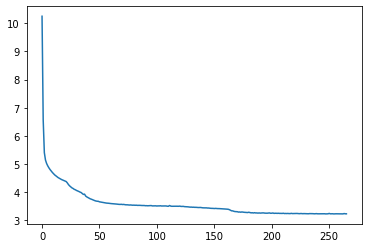

In [21]:
plt.plot(history)

In [22]:
#Not a great answer! let's try a more complicated network

In [23]:
# Create the ANN
mlp = MLPClassifier(hidden_layer_sizes=(25,15,10), max_iter=1000, tol=0.0001) #increasing hidden layers
#Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(25, 15, 10), max_iter=1000)

In [24]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

0.5514176156170114
0.539560822586267


array([[[4152,  186],
        [ 270, 1130]],

       [[3521,  255],
        [  45, 1917]],

       [[3424,  476],
        [ 266, 1572]],

       [[4546,   91],
        [ 377,  724]],

       [[4417,   90],
        [ 320,  911]],

       [[4301,  269],
        [ 213,  955]],

       [[4709,  106],
        [ 328,  595]],

       [[3927,  268],
        [ 128, 1415]],

       [[4509,   53],
        [ 335,  841]],

       [[2974,  194],
        [   9, 2561]],

       [[4397,  149],
        [ 327,  865]],

       [[4650,  229],
        [ 188,  671]],

       [[5738,    0],
        [   0,    0]],

       [[4516,  250],
        [ 156,  816]],

       [[5403,   59],
        [ 136,  140]]], dtype=int64)

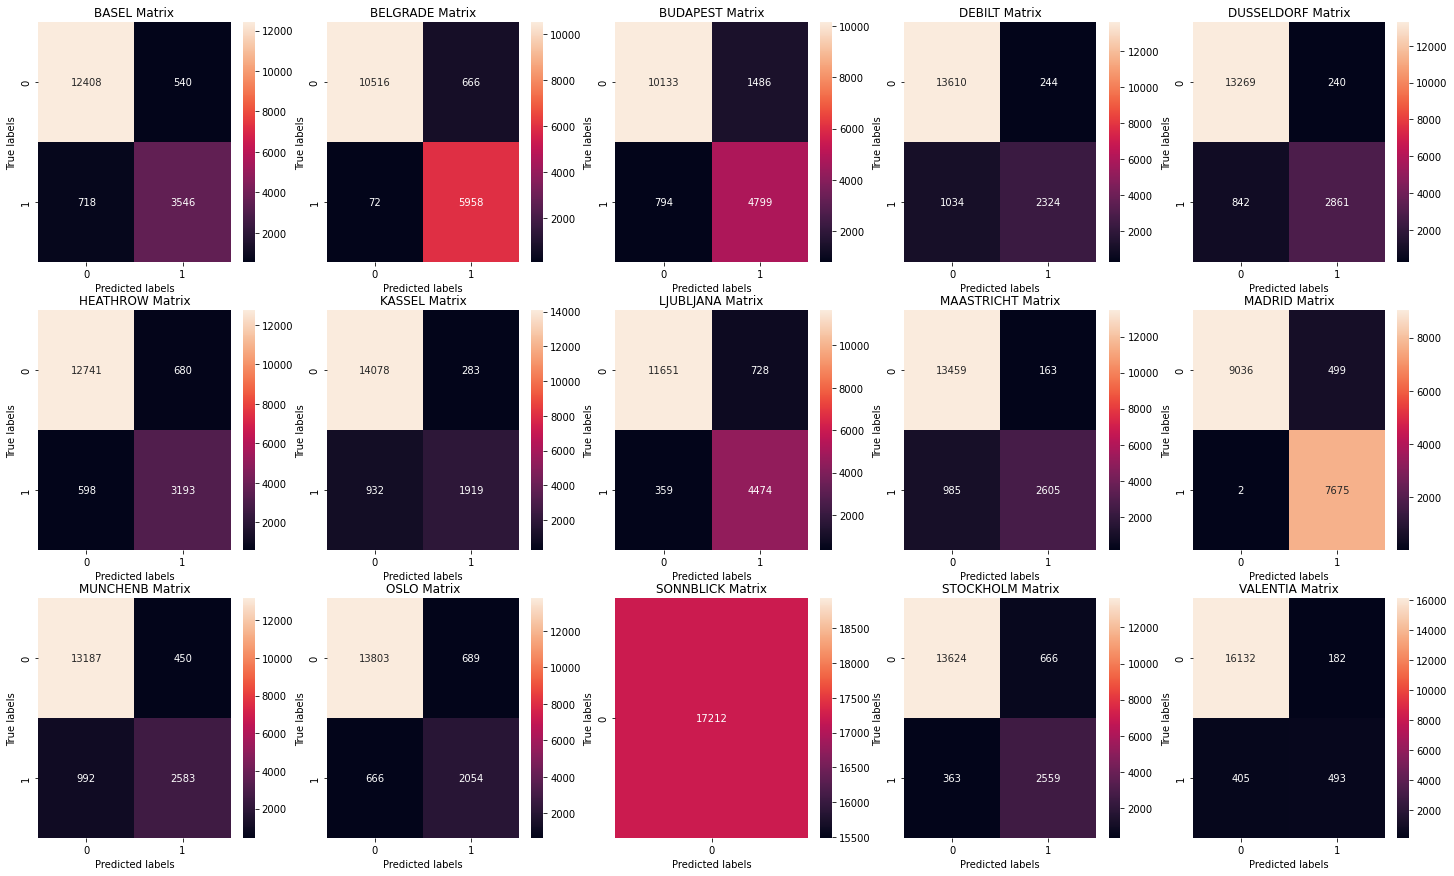

In [25]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

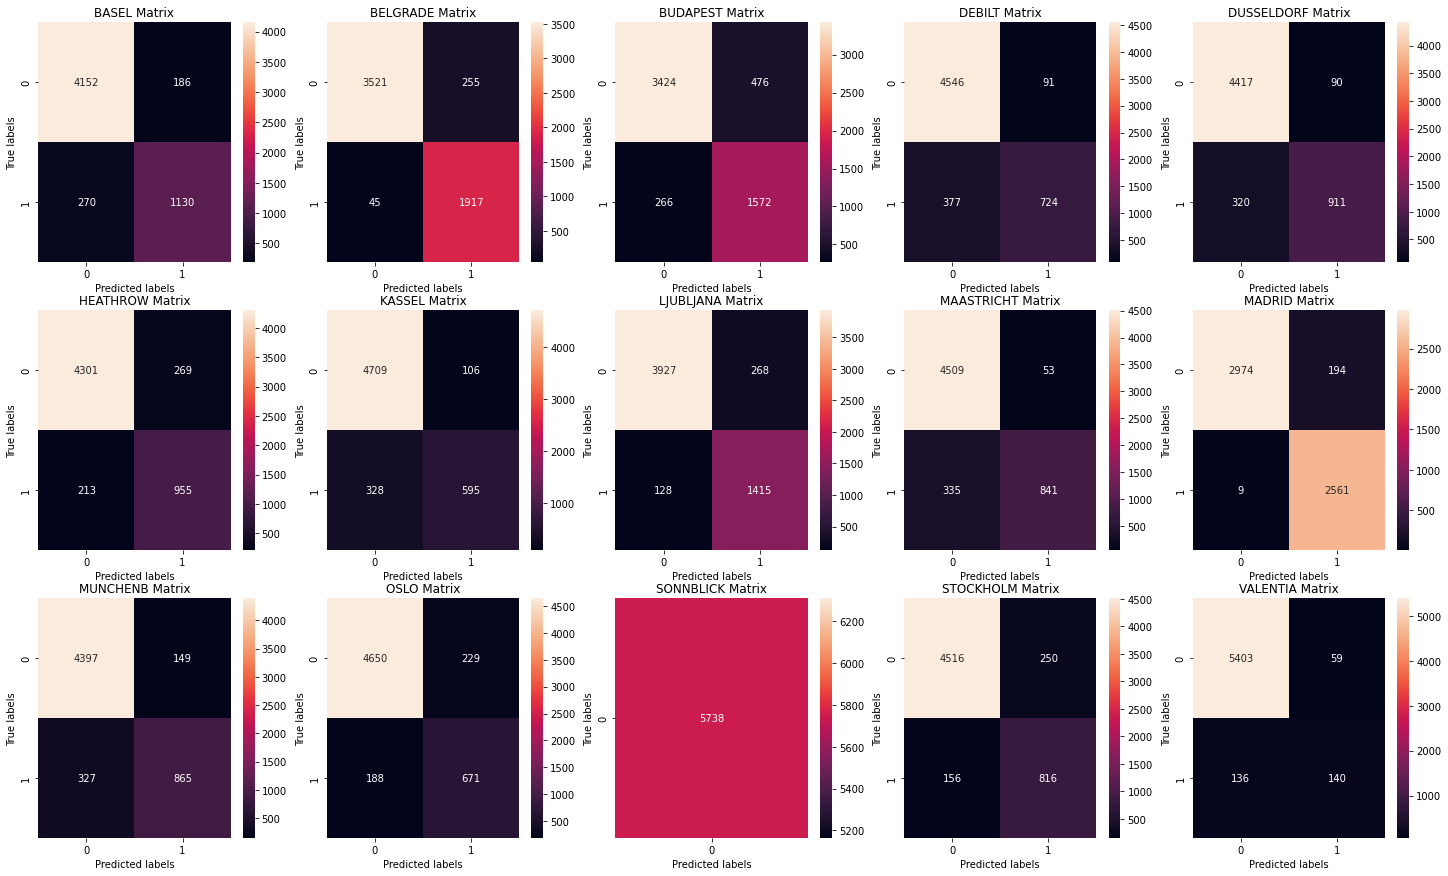

In [26]:
# Confusion matrix based on the last "k" in the sequence (Test data)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [27]:
#let's try one more.

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(35, 25, 15), max_iter=2000, tol=0.00000001)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(35, 25, 15), max_iter=2000, tol=1e-08)

In [29]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
multilabel_confusion_matrix(y_test, y_pred_test)

0.5858122240297466
0.5632624607877309


array([[[4112,  226],
        [ 196, 1204]],

       [[3762,   14],
        [1010,  952]],

       [[3797,  103],
        [ 104, 1734]],

       [[4362,  275],
        [ 173,  928]],

       [[4312,  195],
        [ 136, 1095]],

       [[4283,  287],
        [  99, 1069]],

       [[4609,  206],
        [  51,  872]],

       [[4029,  166],
        [  28, 1515]],

       [[4344,  218],
        [  90, 1086]],

       [[3071,   97],
        [  88, 2482]],

       [[4276,  270],
        [ 185, 1007]],

       [[4703,  176],
        [ 177,  682]],

       [[5738,    0],
        [   0,    0]],

       [[4596,  170],
        [  94,  878]],

       [[5384,   78],
        [ 127,  149]]], dtype=int64)

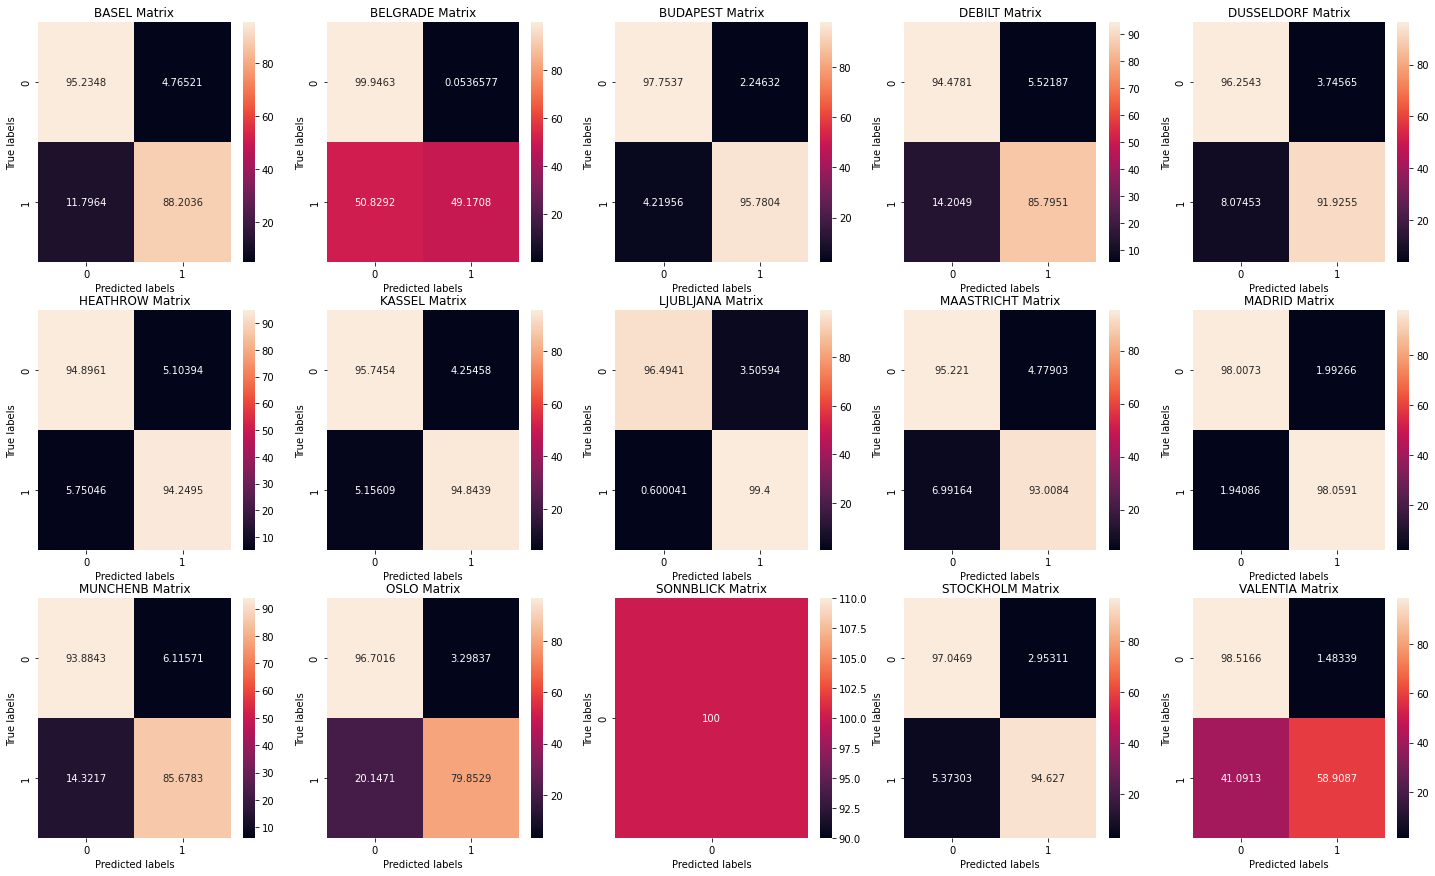

In [36]:
#Confusion matrix based on the last "k" in the sequence (Training data)
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
        ax[i,j] = sns.heatmap(cm_percent, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

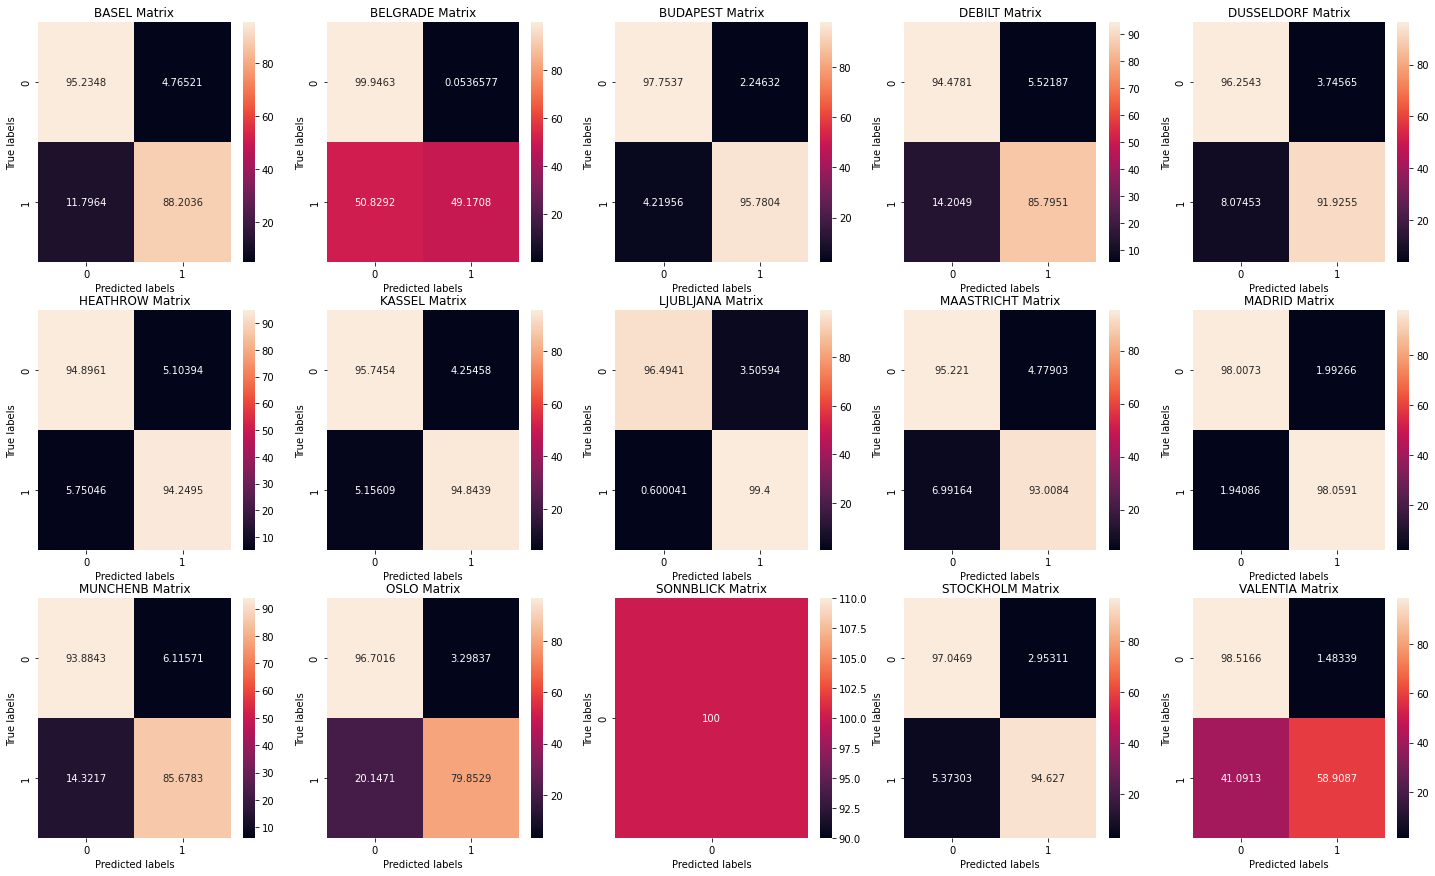

In [37]:
# Confusion matrix based on the last "k" in the sequence (Test data)
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent)
        ax[i,j] = sns.heatmap(cm_percent, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [32]:
history = mlp.loss_curve_

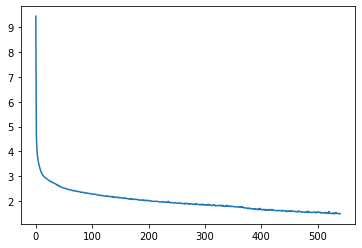

In [33]:
plt.plot(history)